In [1]:
%matplotlib inline

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import theano.tensor as tt

In [4]:
def build_toy_dataset(N, D, K, sigma=1):
    x_train = np.zeros((D, N))
    w = np.random.normal(0.0, 2.0, size=(D, K))
    z = np.random.normal(0.0, 1.0, size=(K, N))
    mean = np.dot(w, z)
    for d in range(D):
        for n in range(N):
            x_train[d, n] = np.random.normal(mean[d, n], sigma)

    print("True principal axes:")
    print(w)
    return x_train

N = 5000  # number of data points
D = 2  # data dimensionality
K = 1  # latent dimensionality

x_train = build_toy_dataset(N, D, K)

True principal axes:
[[-4.25896034]
 [-1.48185688]]


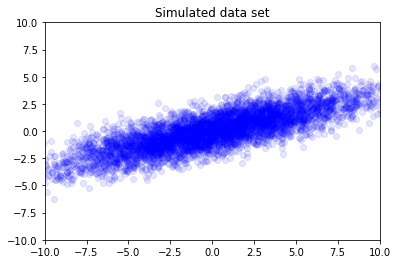

In [5]:
plt.scatter(x_train[0, :], x_train[1, :], color='blue', alpha=0.1)
plt.axis([-10, 10, -10, 10])
plt.title("Simulated data set")
plt.show()

In [23]:
with pm.Model() as PPCA:
    w = pm.Normal('w', mu=tt.zeros([D, K]), sd=2.0 * tt.ones([D, K]), shape=[D, K])
    z = pm.Normal('z', mu=tt.zeros([N, K]), sd=tt.ones([N, K]), shape=[N, K])
    x = pm.Normal('x', mu=w.dot(z.T), sd=tt.ones([D, N]), shape=[D, N], observed=x_train)  

    inference = pm.ADVI('full-rank')
    approx = pm.fit(n=40000, method=inference)
    trace = approx.sample(draws=10000)
    #trace = pm.sample()

Average Loss = 22,023: 100%|██████████| 40000/40000 [00:38<00:00, 1047.24it/s]
Finished [100%]: Average Loss = 22,023


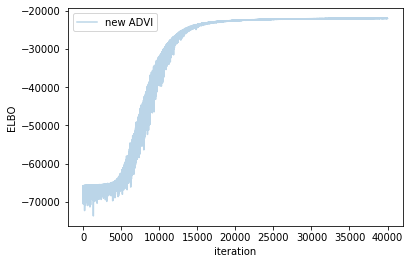

In [24]:
plt.plot(-inference.hist, label='new ADVI', alpha=.3)
#plt.plot(approx.hist, label='old ADVI', alpha=.3)
plt.legend()
plt.ylabel('ELBO')
plt.xlabel('iteration');

In [25]:
print(w.tag.test_value.shape)
print(z.tag.test_value.shape)
print(x.tag.test_value.shape)

(2, 1)
(5000, 1)
(2, 5000)


In [26]:
print(trace['w'].shape)

(10000, 2, 1)


In [27]:
np.mean(trace['w'],axis=0)

array([[-3.76627698],
       [-1.3303144 ]])

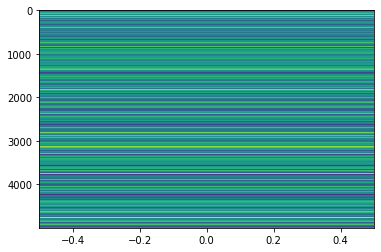

In [30]:
mean_z = np.mean(trace['z'],axis=0)
plt.imshow(mean_z,aspect='auto')